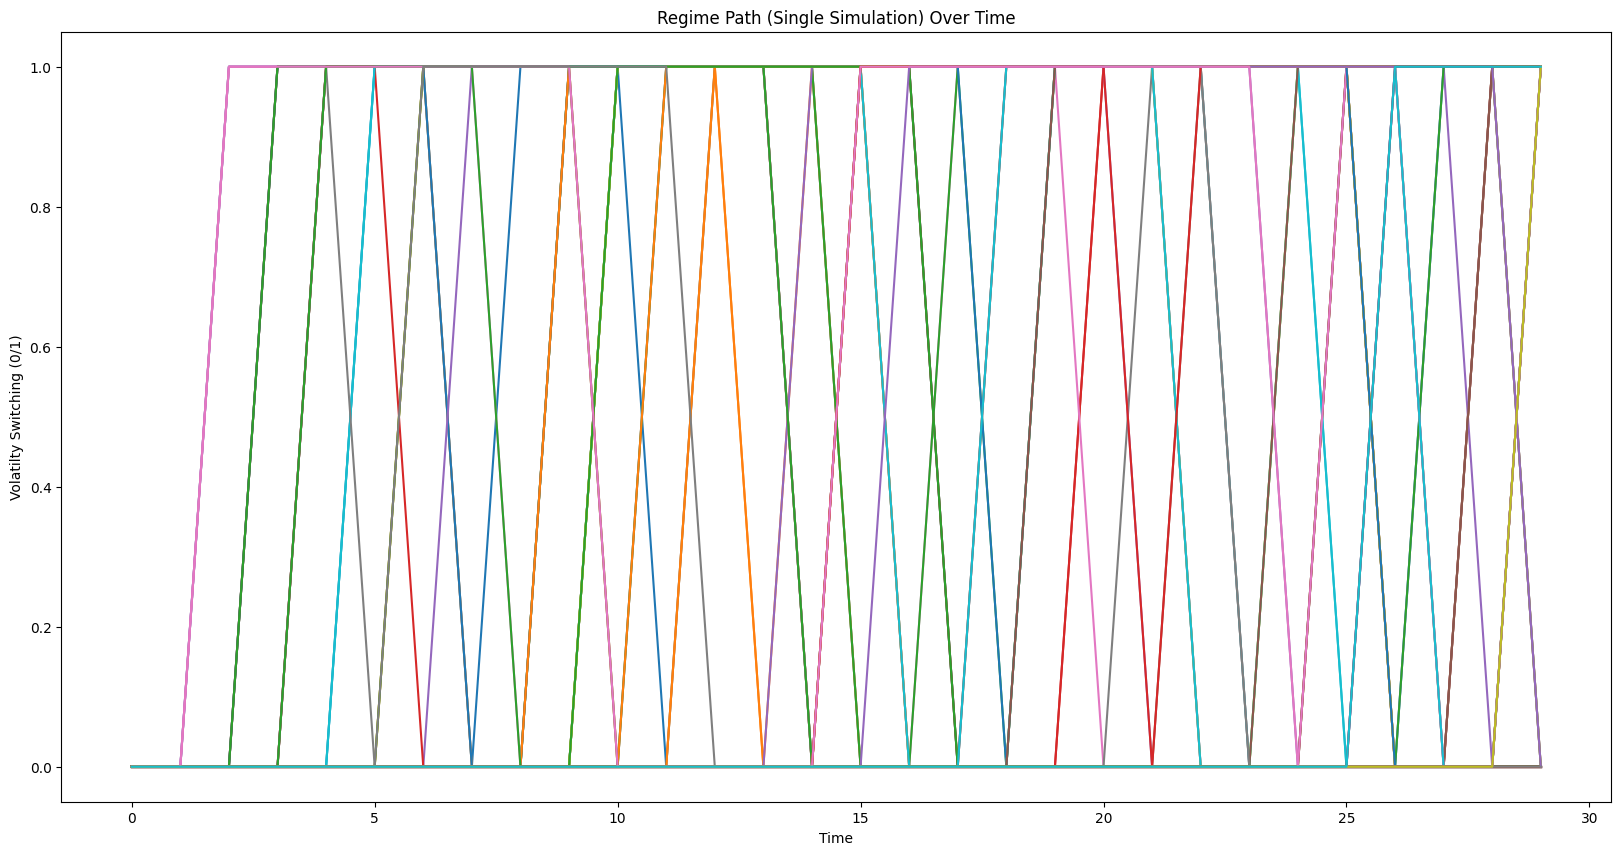

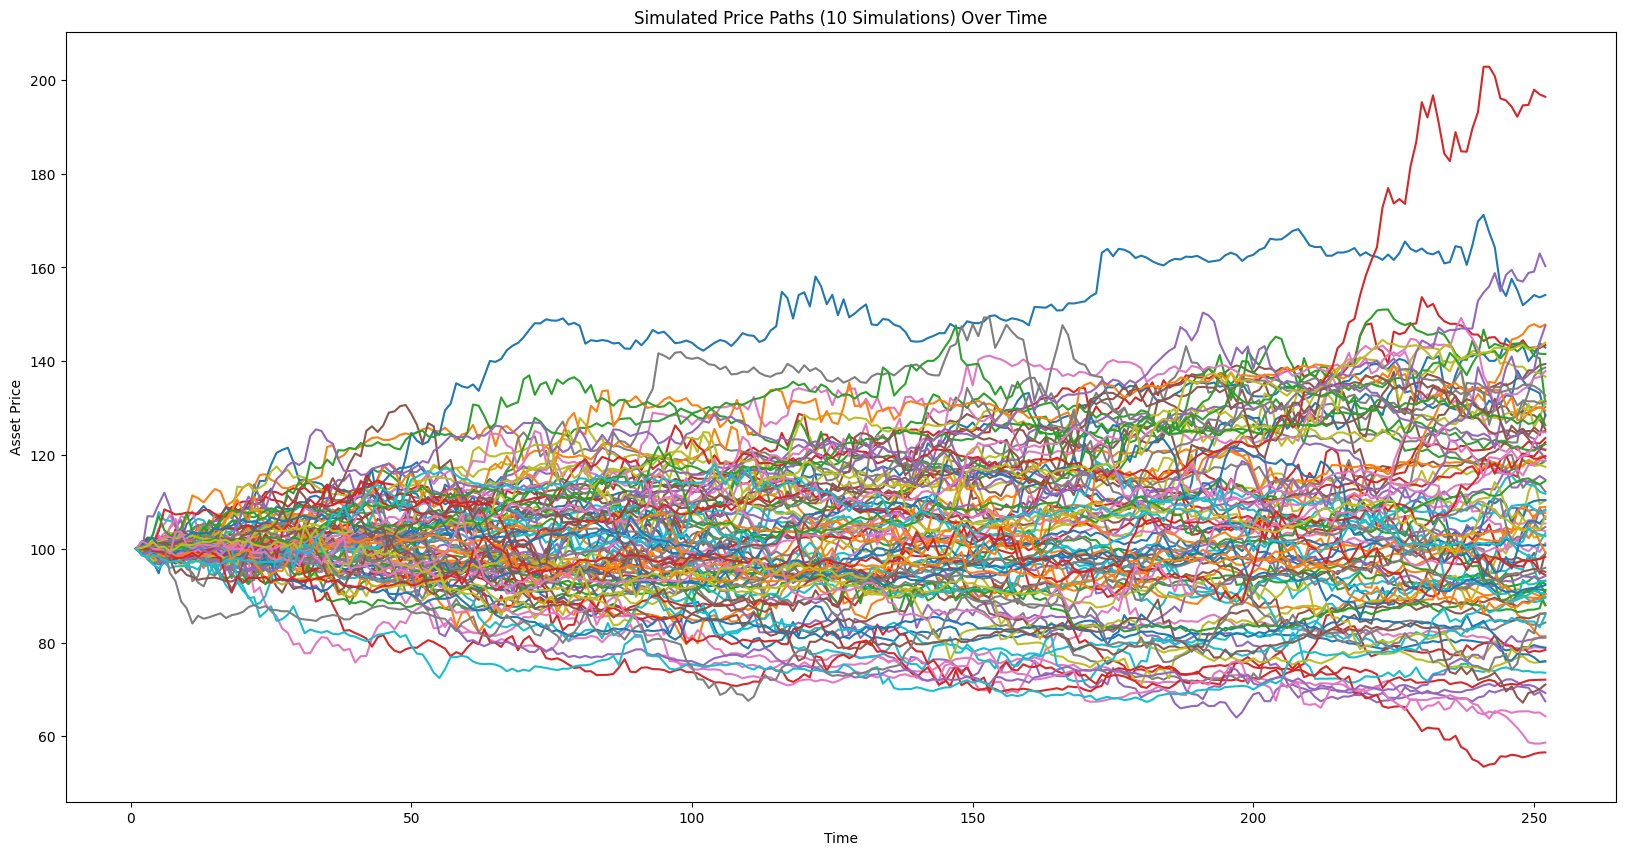

In [183]:
# --- High Persistence Test ---
# --- Importing Modules ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Asset Price Parameters ---

S0 = 100
mu = 0.05
sigma_low = 0.10
sigma_high = 0.35

# --- Simulation Parameters ---

np.random.seed(42)
N = 100 # n_simulations
steps = 252
T = 1
dt = T / 252 

# --- Markov-Switching Volatility Parameters ---

n_regimes = 2
regimes = ['low', 'high']

p_low = np.array([[0.95, 0.05],
                  [0.10, 0.90]])

# --- Regime Path Simulation ---
S = np.zeros((steps, N))
regime_path = np.zeros((steps, N), dtype = int)

for i in range(N):
    # --- Regime Path Simulation ---
    for t in range(1, steps):
        current_state = regime_path[t - 1, i]
        u = np.random.uniform()
        if u < p_low[current_state, 0]:
            regime_path[t, i] = 0
        else:
            regime_path[t, i] = 1

    # --- Brownian Motion Generation ---
    Z = np.random.standard_normal(steps)

    # --- Price Path Simulation ---
    S[0, i] = S0
    for t in range(1, steps):
        sigma_t = sigma_low if regime_path[t, i] == 0 else sigma_high
        S[t, i] = S[t - 1, i] * np.exp((mu - 0.5 * sigma_t**2) * dt + sigma_t * np.sqrt(dt) * Z[t])

column_names = [f'PX{i}' for i in range(1, 253)]

S = pd.DataFrame(S, index = range(1,253,1))

# --- Regime Path (Single Simulation) ---

plt.figure(figsize = (20, 10));
plt.plot(regime_path[:30]);
plt.title('Regime Path (Single Simulation) Over Time');
plt.xlabel('Time');
plt.ylabel('Volatilty Switching (0/1)');
plt.show();

# --- Simulated Price Paths (Randoms) ---
plt.figure(figsize = (20, 10));
plt.plot(S);
plt.title('Simulated Price Paths (10 Simulations) Over Time');
plt.xlabel('Time');
plt.ylabel('Asset Price');